<h1> LetsGrowMore (LGMVIPMAR2022) </h1>
<h2> Author Name - Vaibhav Channe </h2>
<h2> Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM </h2>

<h3>Importing Libraries</h3>

In [5]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [25]:
df=pd.read_csv("NSE-TATAGLOBAL.csv")
print("Data imported successfully")
df.head()

Data imported successfully


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [26]:
df = df.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [27]:
df.isnull().sum()

0

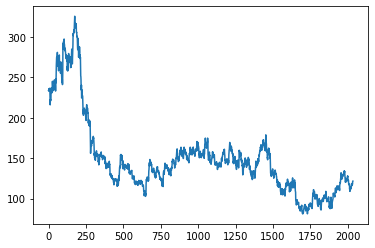

In [28]:
plt.plot(df)

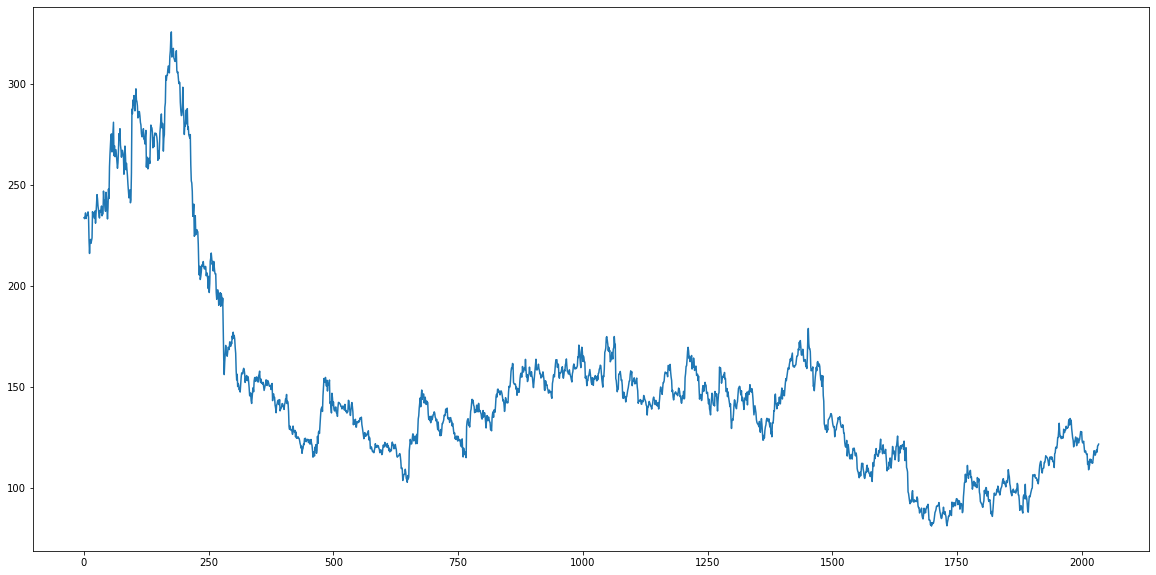

In [29]:
plt.figure(figsize=(20,10))
plt.plot(df)

In [30]:
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

<h3>Preprocessing</h3>

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [32]:
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


<h3>Defining time step and creating training and test datasets according to that time step</h3>

In [33]:
training_size = int(len(df)*0.75)
test_size=int(len(df)) - training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]

In [34]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)    


In [35]:
ts = 100
X_train, y_train = create_features(train_data, ts)
X_test, y_test = create_features(test_data, ts)

In [36]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

<h3>Creating model</h3>

In [37]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 9s 178ms/step - loss: 0.0242 - val_loss: 0.0079
Epoch 2/100
23/23 [==============================] - 4s 159ms/step - loss: 0.0024 - val_loss: 8.5625e-04
Epoch 3/100
23/23 [==============================] - 4s 159ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 4/100
23/23 [==============================] - 4s 159ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 5/100
23/23 [==============================] - 4s 160ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 4s 159ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/100
23/23 [==============================] - 4s 160ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 8/100
23/23 [==============================] - 4s 160ms/step - loss: 0.0012 - val_loss: 8.0869e-04
Epoch 9/100
23/23 [==============================] - 4s 160ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 4s 159ms/step - loss: 9.9537e

In [40]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [41]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

<h3>Calculating RMSE</h3>

In [42]:
math.sqrt(mean_squared_error(y_train,train_predict))

163.83751446966494

In [43]:
math.sqrt(mean_squared_error(y_test,test_predict))

105.85154942044603

<h3>Plotting the graph according to train and test data</h3>

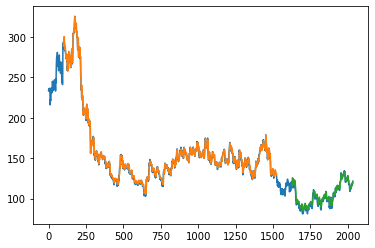

In [44]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)


509

In [46]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

<h3>Predicting values for next 30 days</h3>

In [48]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16748153]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
len(df)

2035

<h3>This is the graph of actual values in last 100 days</h3>

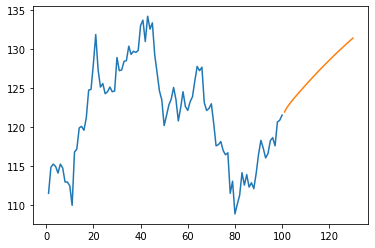

In [51]:
plt.plot(day_new,scaler.inverse_transform(df[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

<h3>And this is the graph of predicted values for next 30 days</h3>

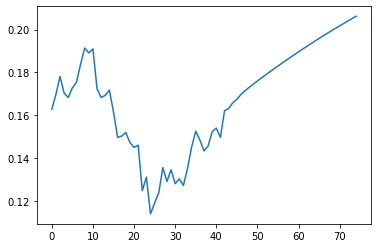

In [52]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1990:])

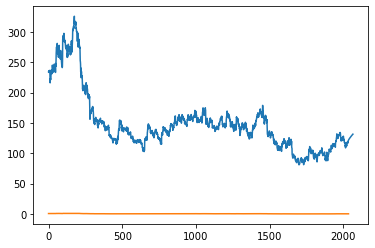

In [53]:
df1=scaler.inverse_transform(df1).tolist()
plt.plot(df1)
plt.plot(df)